1. Importing Libraries

In [ ]:
import pandas as pd  # Data manipulation library
import numpy as np  # Provides numerical arrays and functions
import random
import matplotlib.pyplot as plt  # Data visualization library
from wordcloud import WordCloud, STOPWORDS  # Used to generate word cloud
import seaborn as sns  # Data visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



2. Reading and Exploring the Data

In [29]:
# Load datasets
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")
tags = pd.read_csv("tags.csv")

# Display basic information about each dataset
print("Loading movies.csv...")
print("Shape of movies.csv:", movies.shape)
print("First 5 entries:\n", movies.head())
movies.info()
print("Number of unique movies:", movies['movieId'].nunique())

print("\nLoading ratings.csv...")
print("Shape of ratings.csv:", ratings.shape)
print("Summary statistics of ratings.csv:\n", ratings.describe())
print("Minimum rating:", ratings['rating'].min())
print("Maximum rating:", ratings['rating'].max())

print("\nLoading tags.csv...")
print("Shape of tags.csv:", tags.shape)
print("First 5 entries:\n", tags.head())
tags.info()
print("Number of unique tags:", tags['tag'].nunique())


Loading movies.csv...
Shape of movies.csv: (9742, 3)
First 5 entries:
    movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 2

3. Cleaning the Data

In [30]:
print("\nChecking for missing values:")
print("Movies.csv:\n", movies.isnull().sum())
print("Ratings.csv:\n", ratings.isnull().sum())
print("Tags.csv:\n", tags.isnull().sum())


print("\nCleaning datasets by dropping nulls...")
movies.dropna(inplace=True)
ratings.dropna(inplace=True)
tags.dropna(inplace=True)

print("\nMissing values after cleaning:")
print("Movies.csv:\n", movies.isnull().sum())
print("Ratings.csv:\n", ratings.isnull().sum())
print("Tags.csv:\n", tags.isnull().sum())



Checking for missing values:
Movies.csv:
 movieId    0
title      0
genres     0
dtype: int64
Ratings.csv:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
Tags.csv:
 userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

Cleaning datasets by dropping nulls...

Missing values after cleaning:
Movies.csv:
 movieId    0
title      0
genres     0
dtype: int64
Ratings.csv:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
Tags.csv:
 userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


4. Data Analysis

A. Genre Filtering & Tag Search


In [31]:
# Filter movies by genre (e.g., Drama, Comedy)
drama_movies = movies['genres'].str.contains('Drama', na=False)
print("\nDrama Movies:\n", movies[drama_movies].head())
print("Total Drama movies:", drama_movies.sum())

comedy_movies = movies['genres'].str.contains('Comedy', na=False)
print("\nComedy Movies:\n", movies[comedy_movies].head())
print("Total Comedy movies:", comedy_movies.sum())

# Search for movies with a specific tag (e.g., 'dark')
search_tag = 'dark'
tag_search = tags['tag'].str.contains(search_tag, case=False, na=False)
print(f"\nMovies with tag '{search_tag}':\n", tags[tag_search].head())



Drama Movies:
     movieId                           title                genres
3         4        Waiting to Exhale (1995)  Comedy|Drama|Romance
10       11  American President, The (1995)  Comedy|Drama|Romance
13       14                    Nixon (1995)                 Drama
15       16                   Casino (1995)           Crime|Drama
16       17    Sense and Sensibility (1995)         Drama|Romance
Total Drama movies: 4361

Comedy Movies:
    movieId                               title  \
0        1                    Toy Story (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   
6        7                      Sabrina (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


B. Merging Datasets and Extracting Year

In [32]:
print("\nMerging Movies and Ratings Data...")

# Merge movies and ratings
merged_data = movies.merge(ratings, on='movieId', how='inner')

# Check unique movies after merging
print("Unique movies in dataset after merging:", merged_data['title'].nunique())

# Group by movie and calculate the **average rating** and **rating count**
movie_ratings = merged_data.groupby(['movieId', 'title']).agg({'rating': ['mean', 'count']})
movie_ratings.columns = ['avg_rating', 'rating_count']  # Rename columns
movie_ratings = movie_ratings.reset_index()

# Filter movies with at least **30 ratings** (adjustable)
popular_movies = movie_ratings[movie_ratings['rating_count'] >= 30]

# Sort to get the **best-rated movies**
high_rated_movies = popular_movies[popular_movies['avg_rating'] > 4.0].sort_values(by='avg_rating', ascending=False).head(10)

# Sort to get the **lowest-rated movies**
low_rated_movies = popular_movies[popular_movies['avg_rating'] < 3.0].sort_values(by='avg_rating', ascending=True).head(10)

print("\nMovies with High Ratings (> 4.0, at least 30 ratings):\n", high_rated_movies)
print("\nMovies with Low Ratings (< 3.0, at least 30 ratings):\n", low_rated_movies)

# Extract release year from movie titles
print("\nExtracting Release Year from Movie Titles...")
movies['year'] = movies['title'].str.extract(r'.*\((\d{4})\).*', expand=False).fillna("Unknown")

print("\nSample Movies with Release Year:\n", movies[['title', 'year']].head(10))



Merging Movies and Ratings Data...
Unique movies in dataset after merging: 9719

Movies with High Ratings (> 4.0, at least 30 ratings):
       movieId                                              title  avg_rating  \
277       318                   Shawshank Redemption, The (1994)    4.429022   
905      1204                          Lawrence of Arabia (1962)    4.300000   
659       858                              Godfather, The (1972)    4.289062   
2224     2959                                  Fight Club (1999)    4.272936   
974      1276                              Cool Hand Luke (1967)    4.271930   
602       750  Dr. Strangelove or: How I Learned to Stop Worr...    4.268041   
686       904                                 Rear Window (1954)    4.261905   
921      1221                     Godfather: Part II, The (1974)    4.259690   
6298    48516                               Departed, The (2006)    4.252336   
965      1267                   Manchurian Candidate, The (196

C. Counting Genre Occurrences

In [33]:
# Counting occurrences of each genre
print("\nCounting Genre Occurrences...")

# Function to count occurrences of each genre
def count_word(df, ref_col, unique_genres):
    genre_count = {genre: 0 for genre in unique_genres}  # Initialize genre count dictionary
    for genre_list in df[ref_col].dropna().str.split('|'):  # Split genres by '|'
        for genre in genre_list:
            genre_count[genre] += 1  # Increment count for each genre
    return sorted(genre_count.items(), key=lambda x: x[1], reverse=True), genre_count

# Extracting unique genres
genre_labels = set()
for genres in movies['genres'].dropna().str.split('|'):
    genre_labels.update(genres)  # Add each unique genre to the set

# Counting occurrences
keyword_occurrences, genre_counts = count_word(movies, 'genres', genre_labels)

print("\nGenre Frequencies:\n", keyword_occurrences)  # Sorted genre count




Counting Genre Occurrences...

Genre Frequencies:
 [('Drama', 4361), ('Comedy', 3756), ('Thriller', 1894), ('Action', 1828), ('Romance', 1596), ('Adventure', 1263), ('Crime', 1199), ('Sci-Fi', 980), ('Horror', 978), ('Fantasy', 779), ('Children', 664), ('Animation', 611), ('Mystery', 573), ('Documentary', 440), ('War', 382), ('Musical', 334), ('Western', 167), ('IMAX', 158), ('Film-Noir', 87), ('(no genres listed)', 34)]


Section 4: Data Visualization


A. WordCloud of Genres

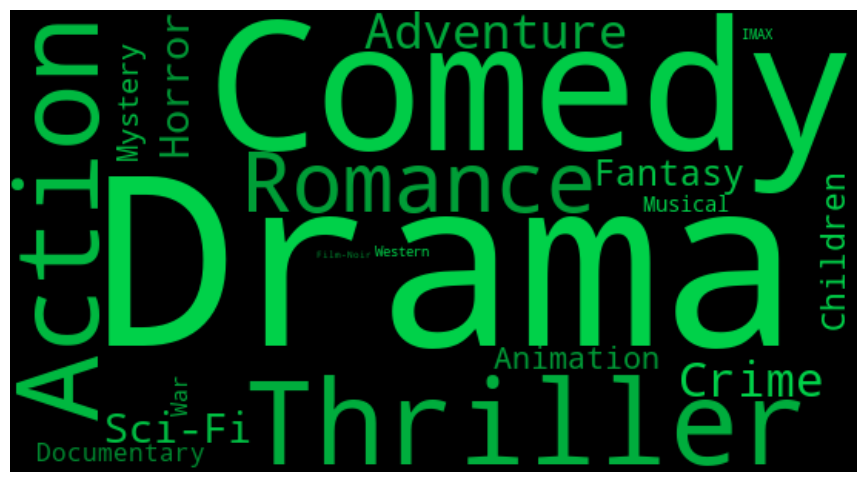

In [34]:
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 100 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return f"hsl({h}, {s}%, {l}%)"

words = {s[0]: s[1] for s in keyword_occurrences[:50]}
plt.figure(figsize=(14, 6))
from wordcloud import WordCloud
wordcloud = WordCloud(width=550, height=300, background_color='black', 
                      max_words=1628, relative_scaling=0.7,
                      color_func=random_color_func, normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


B. Genre Popularity Histogram

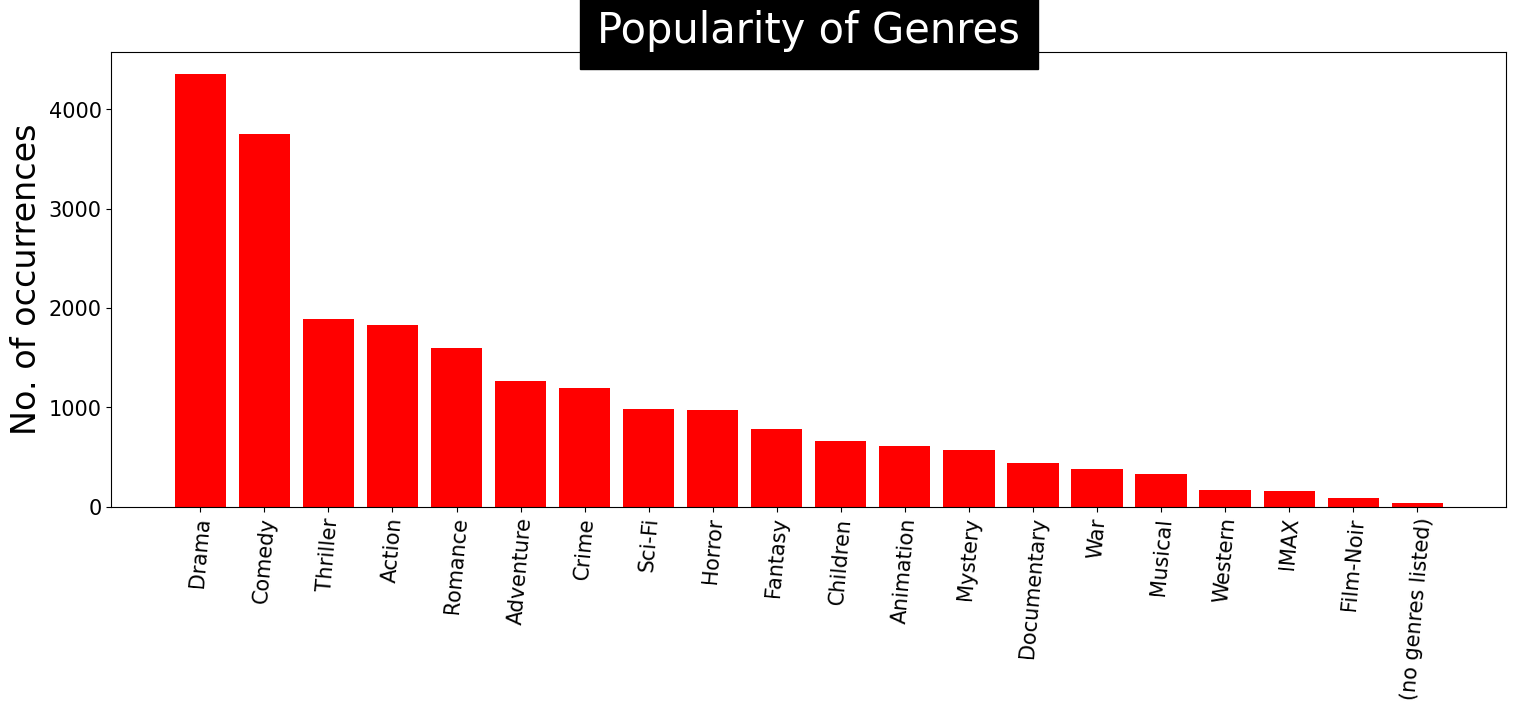

In [35]:
fig = plt.figure(figsize=(18, 13))
ax2 = fig.add_subplot(2, 1, 2)
y_axis = [i[1] for i in keyword_occurrences[:50]]
x_axis = list(range(len(y_axis)))
x_label = [i[0] for i in keyword_occurrences[:50]]
plt.xticks(rotation=85, fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurrences", fontsize=24)
ax2.bar(x_axis, y_axis, align='center', color='r')
plt.title("Popularity of Genres", bbox={'facecolor': 'k', 'pad': 5}, color='w', fontsize=30)
plt.show()


Section 5: Collaborative Filtering (SVD) for Recommendations

A. Create the User-Item Matrix

In [36]:
print("\nCreating User-Item Utility Matrix...")
user_movie_matrix = ratings.pivot(index="userId", columns="movieId", values="rating")
user_movie_matrix_filled = user_movie_matrix.fillna(0)
print("Utility matrix shape:", user_movie_matrix_filled.shape)

# Create mapper dictionaries (used later in content-based filtering)
from scipy.sparse import csr_matrix
X_sparse_filled = csr_matrix(user_movie_matrix_filled.values)  # Full matrix (without normalization)

def create_mapper(df):
    M = df.index.nunique()
    N = df.columns.nunique()
    user_mapper = dict(zip(df.index, list(range(M))))
    movie_mapper = dict(zip(df.columns, list(range(N))))
    user_inv_mapper = {v: k for k, v in user_mapper.items()}
    movie_inv_mapper = {v: k for k, v in movie_mapper.items()}
    return user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_mapper(user_movie_matrix_filled)



Creating User-Item Utility Matrix...
Utility matrix shape: (610, 9724)


B. Apply SVD (Matrix Factorization)

In [ ]:
from sklearn.decomposition import TruncatedSVD

print("\nApplying Truncated SVD for Collaborative Filtering with Normalization...")

# Compute the mean rating for each user (from the original pivot; we use 'user_movie_matrix' so NaNs are not included)
user_means = user_movie_matrix.mean(axis=1)

# Normalize the matrix by subtracting user means (this centers each user's ratings)
normalized_matrix = user_movie_matrix.sub(user_means, axis=0).fillna(0)

# Convert the normalized matrix to a sparse matrix
X_sparse = csr_matrix(normalized_matrix.values)

# Apply Truncated SVD on the normalized matrix
n_components = 100 # number of latent factors (try increasing if needed)
svd = TruncatedSVD(n_components=n_components, random_state=42)
U = svd.fit_transform(X_sparse)
Sigma = np.diag(svd.singular_values_)  # Create a diagonal matrix for singular values
Vt = svd.components_

# Reconstruct the normalized predicted ratings matrix
reconstructed_matrix = np.dot(U, np.dot(Sigma, Vt))

# Add back the user means to denormalize the predictions
final_predictions = reconstructed_matrix + user_means.values[:, np.newaxis]

# Clip the predictions to the valid rating range [0.5, 5]
final_predictions = np.clip(final_predictions, 0.5, 5)

# Debug Output: Check sample predictions
print("\nDebug: Matrix Shapes")
print(f"U shape: {U.shape}, Sigma shape: {Sigma.shape}, Vt shape: {Vt.shape}")
print("\nDebug: Sample Predictions (First 5 Rows & 5 Columns):")
print(final_predictions[:5, :5])

# Convert final predictions back into a DataFrame (optional)
predicted_matrix_df = pd.DataFrame(final_predictions, index=user_movie_matrix.index, columns=user_movie_matrix.columns)




Applying Truncated SVD for Collaborative Filtering with Normalization...

Debug: Matrix Shapes
U shape: (610, 100), Sigma shape: (100, 100), Vt shape: (100, 9724)

Debug: Sample Predictions (First 5 Rows & 5 Columns):
[[5.         0.5        2.89081491 4.7204175  2.56390974]
 [3.7557339  3.41168515 3.71998865 4.00096219 4.30364427]
 [0.5        4.35505994 2.45610915 2.84938533 3.57415728]
 [5.         4.31062514 3.41294339 2.8185137  2.00157855]
 [5.         3.12132796 2.27480661 3.13848297 1.81141072]]


C. Evaluate SVD Predictions


SVD Regression Metrics:
MSE: 2.0893, MAE: 1.1606, R²: -0.9224

SVD Classification Metrics:
Accuracy: 0.8549
Precision: 0.8937
Recall: 0.8660
F1-Score: 0.8796
AUC-ROC: 0.8517


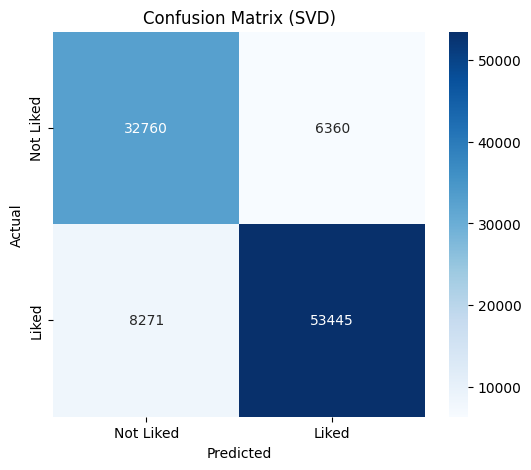

In [38]:
# Convert the user-item matrix and predicted matrix to NumPy arrays for evaluation
user_movie_matrix_np = user_movie_matrix_filled.to_numpy()
# Use final_predictions from the normalized SVD reconstruction
predicted_matrix_np = final_predictions     

# Use a mask to extract only non-zero (observed) ratings
mask = user_movie_matrix_np != 0
true_ratings = user_movie_matrix_np[mask]
pred_ratings = predicted_matrix_np[mask]

# Evaluate regression metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(true_ratings, pred_ratings)
mae = mean_absolute_error(true_ratings, pred_ratings)
r2 = r2_score(true_ratings, pred_ratings)
print("\nSVD Regression Metrics:")
print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

# Convert predicted ratings into binary classification (liked vs. not liked)
threshold = 3.5
y_true_binary = (true_ratings >= threshold).astype(int)
y_pred_binary = (pred_ratings >= threshold).astype(int)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
acc = accuracy_score(y_true_binary, y_pred_binary)
prec = precision_score(y_true_binary, y_pred_binary, zero_division=0)
rec = recall_score(y_true_binary, y_pred_binary, zero_division=0)
f1 = f1_score(y_true_binary, y_pred_binary, zero_division=0)
try:
    auc = roc_auc_score(y_true_binary, y_pred_binary)
except ValueError:
    auc = None

print("\nSVD Classification Metrics:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")
if auc is not None:
    print(f"AUC-ROC: {auc:.4f}")
else:
    print("AUC-ROC: Not computable (one class present)")

# Plot the confusion matrix for SVD binary predictions
from matplotlib.colors import LinearSegmentedColormap
# custom_cmap = LinearSegmentedColormap.from_list("custom_green", ["#009e40", "#00cc66"])
cm = confusion_matrix(y_true_binary, y_pred_binary)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Liked", "Liked"], yticklabels=["Not Liked", "Liked"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (SVD)")
plt.show()



Section 6: Hybrid Model (Collaborative + Content-Based)

In [39]:
# Ensure 'rating' and 'movieId' exist
if 'rating' in ratings.columns and 'movieId' in ratings.columns:
    # Compute movie-specific average rating (R) and vote count (v)
    movie_stats = ratings.groupby('movieId')['rating'].agg(['mean', 'count'])
    movie_stats.rename(columns={'mean': 'R', 'count': 'v'}, inplace=True)

    # Compute global average rating (C)
    C = ratings['rating'].mean()

    # Define minimum votes required (m)
    m = movie_stats['v'].quantile(0.7)  # Top 30% of movies

    # Apply Bayesian formula
    movie_stats['bayesian_avg'] = (movie_stats['R'] * movie_stats['v'] + C * m) / (movie_stats['v'] + m)

    # Merge with movies DataFrame   
    movies = movies.merge(movie_stats[['bayesian_avg']], how='left', left_on='movieId', right_index=True)

# Check if 'bayesian_avg' exists now
print(movies[['movieId', 'bayesian_avg']].head())



   movieId  bayesian_avg
0        1      3.907707
1        2      3.435991
2        3      3.288320
3        4      2.929350
4        5      3.125195


In [40]:
print("\nBuilding Hybrid Model (SVD + Bayesian Average)...")
np.random.seed(42)

# Ensure consistent movie indexing
num_movies = predicted_matrix_np.shape[1]  # Match movie count with predicted_matrix_np
sorted_movie_ids = sorted(movies['movieId'].dropna().unique())[:num_movies]  # Ensure consistent order
movie_id_map = {movie_id: idx for idx, movie_id in enumerate(sorted_movie_ids)}

# Initialize Bayesian matrix correctly
bayesian_matrix = np.zeros((user_movie_matrix_np.shape[0], num_movies))

# Populate Bayesian matrix safely
for movie in sorted_movie_ids:
    if movie in movie_id_map:  # Ensure movie exists in mapping
        movie_index = movie_id_map[movie]
        bayesian_rating = movies.loc[movies['movieId'] == movie, 'bayesian_avg'].values
        if movie_index < num_movies and bayesian_rating.size > 0:
            bayesian_value = bayesian_rating[0] if not np.isnan(bayesian_rating[0]) else 0  # Handle NaN safely
            bayesian_matrix[:, movie_index] = bayesian_value

# Combine SVD predictions with Bayesian average using a weighted sum
alpha = 0.5  # Adjust if needed
hybrid_predicted_matrix = alpha * predicted_matrix_np + (1 - alpha) * bayesian_matrix

# Ensure mask applies correctly
hybrid_mask = user_movie_matrix_np != 0
hybrid_pred_ratings = hybrid_predicted_matrix[hybrid_mask]

# Evaluate the hybrid predictions
mse_hybrid = mean_squared_error(true_ratings, hybrid_pred_ratings)
mae_hybrid = mean_absolute_error(true_ratings, hybrid_pred_ratings)
r2_hybrid = r2_score(true_ratings, hybrid_pred_ratings)

print("\nHybrid Regression Metrics:")
print(f"MSE: {mse_hybrid:.4f}, MAE: {mae_hybrid:.4f}, R²: {r2_hybrid:.4f}")

alphas = [0.5, 0.6, 0.7, 0.8, 0.9]
for alpha in alphas:
    hybrid_predicted_matrix = alpha * predicted_matrix_np + (1 - alpha) * bayesian_matrix
    hybrid_pred_ratings = hybrid_predicted_matrix[mask]
    mse_hybrid = mean_squared_error(true_ratings, hybrid_pred_ratings)
    mae_hybrid = mean_absolute_error(true_ratings, hybrid_pred_ratings)
    r2_hybrid = r2_score(true_ratings, hybrid_pred_ratings)
    print(f"\nAlpha: {alpha}")
    print(f"Hybrid MSE: {mse_hybrid:.4f}, MAE: {mae_hybrid:.4f}, R²: {r2_hybrid:.4f}")




Building Hybrid Model (SVD + Bayesian Average)...

Hybrid Regression Metrics:
MSE: 0.6042, MAE: 0.6288, R²: 0.4440

Alpha: 0.5
Hybrid MSE: 0.6042, MAE: 0.6288, R²: 0.4440

Alpha: 0.6
Hybrid MSE: 0.7440, MAE: 0.7024, R²: 0.3155

Alpha: 0.7
Hybrid MSE: 0.9624, MAE: 0.7943, R²: 0.1146

Alpha: 0.8
Hybrid MSE: 1.2594, MAE: 0.9046, R²: -0.1587

Alpha: 0.9
Hybrid MSE: 1.6350, MAE: 1.0300, R²: -0.5044


Section 7: Content-Based Filtering (Using Genres)

In [41]:
print("\nPreparing Genre Features for Content-Based Filtering...")

# Ensure 'genres' column exists
if 'genres' not in movies.columns:
    raise ValueError("Error: 'genres' column is missing from the movies dataset!")

# Convert genres column into a list of genres
movies['genres'] = movies['genres'].apply(lambda x: x.split('|') if isinstance(x, str) else [])

# Convert genres into one-hot encoded format
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(movies['genres'])

# Create DataFrame for genres
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_, index=movies.index)

print(f"Genre one-hot encoded DataFrame shape: {genre_df.shape}")



Preparing Genre Features for Content-Based Filtering...
Genre one-hot encoded DataFrame shape: (9742, 20)


In [42]:
print("\nContent-Based Filtering using Genres...")
from sklearn.metrics.pairwise import cosine_similarity
# Use the one-hot encoded genre features (genre_df) from earlier
genre_cosine_sim = cosine_similarity(genre_df, genre_df)
print(f"Genre cosine similarity matrix shape: {genre_cosine_sim.shape}")

# Fuzzy matching for movie title search
from fuzzywuzzy import process
def movie_finder(title):
    all_titles = movies['title'].tolist()
    closest_match = process.extractOne(title, all_titles)
    return closest_match[0]

# Create a mapping from movie title to index
movie_idx = dict(zip(movies['title'], movies.index))

def get_content_based_recommendations(title_string, n_recommendations=10):
    title = movie_finder(title_string)
    idx = movie_idx[title]
    sim_scores = list(enumerate(genre_cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:n_recommendations+1]
    recommended_indices = [i[0] for i in sim_scores]
    print(f"Because you watched {title}:")
    print(movies['title'].iloc[recommended_indices])

print("\nContent-Based Recommendations for 'Toy Story':")
get_content_based_recommendations("Toy Story", n_recommendations=5)



Content-Based Filtering using Genres...
Genre cosine similarity matrix shape: (9742, 9742)

Content-Based Recommendations for 'Toy Story':
Because you watched Toy Story (1995):
1706                                       Antz (1998)
2355                                Toy Story 2 (1999)
2809    Adventures of Rocky and Bullwinkle, The (2000)
3000                  Emperor's New Groove, The (2000)
3568                             Monsters, Inc. (2001)
Name: title, dtype: object


Section 8: Additional Visualizations

In [43]:
true_ratings = np.nan_to_num(true_ratings)
pred_ratings = np.nan_to_num(pred_ratings)
hybrid_pred_ratings = np.nan_to_num(hybrid_pred_ratings)



Generating Additional Visualizations...


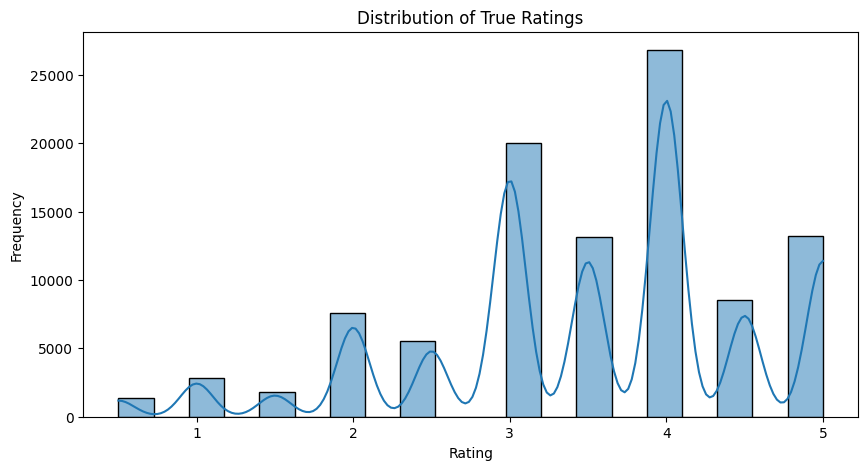

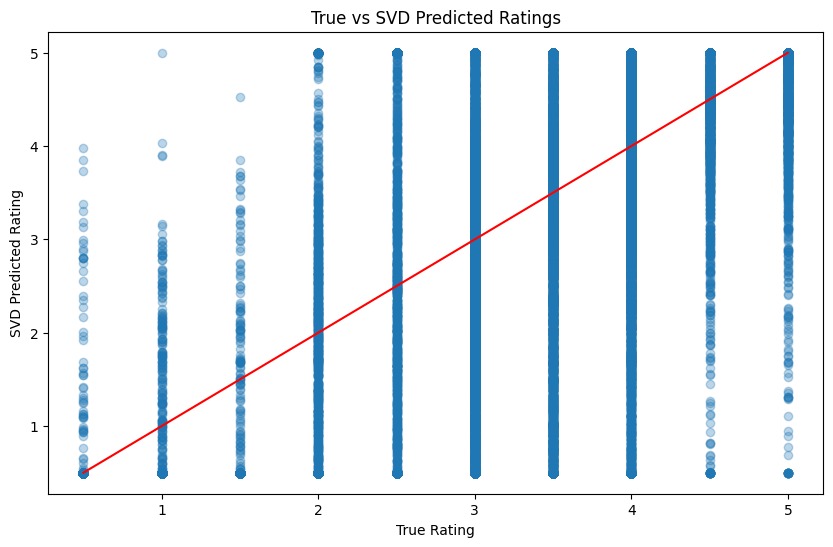

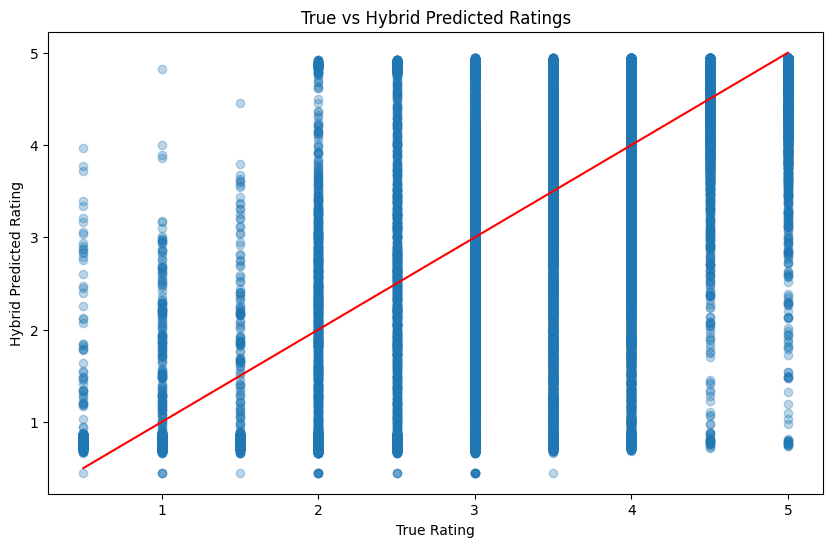

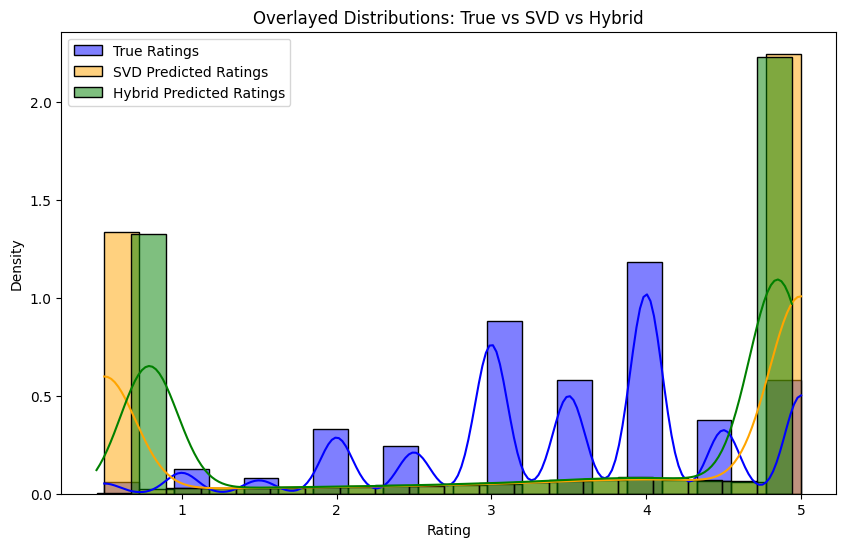

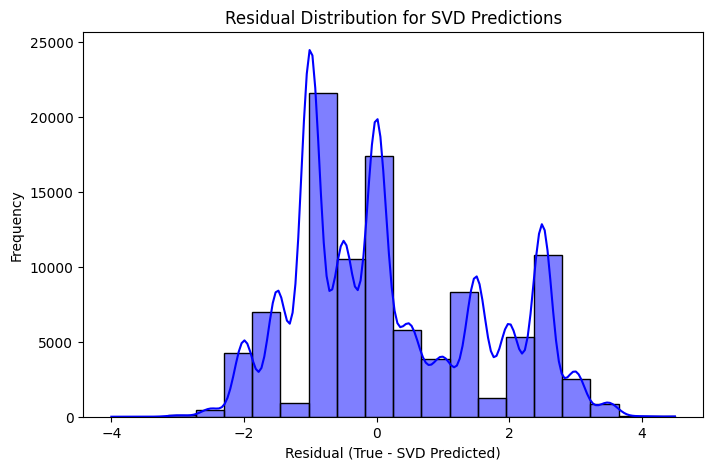

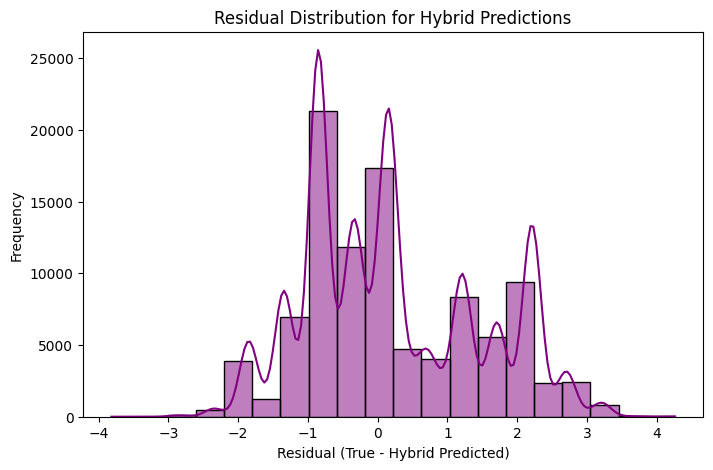

Pearson Correlation for SVD Predictions: 0.7373 (p-value: 0.0000e+00)
Pearson Correlation for Hybrid Predictions: 0.7378 (p-value: 0.0000e+00)


In [46]:
print("\nGenerating Additional Visualizations...")

# Histogram of true ratings
plt.figure(figsize=(10, 5))
sns.histplot(true_ratings, bins=20, kde=True)
plt.title("Distribution of True Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# Scatter plot: True vs SVD Predicted Ratings
plt.figure(figsize=(10, 6))
plt.scatter(true_ratings, pred_ratings, alpha=0.3)
plt.title("True vs SVD Predicted Ratings")
plt.xlabel("True Rating")
plt.ylabel("SVD Predicted Rating")
plt.plot([0.5, 5], [0.5, 5], color='red')  # Diagonal reference line
plt.show()

# Scatter plot: True vs Hybrid Predicted Ratings
plt.figure(figsize=(10, 6))
plt.scatter(true_ratings, hybrid_pred_ratings, alpha=0.3)
plt.title("True vs Hybrid Predicted Ratings")
plt.xlabel("True Rating")
plt.ylabel("Hybrid Predicted Rating")
plt.plot([0.5, 5], [0.5, 5], color='red')  # Diagonal reference line
plt.show()

# Overlayed histogram for True Ratings, SVD Predictions, and Hybrid Predictions
plt.figure(figsize=(10, 6))
sns.histplot(true_ratings, bins=20, kde=True, color='blue', label='True Ratings', stat='density')
sns.histplot(pred_ratings, bins=20, kde=True, color='orange', label='SVD Predicted Ratings', stat='density', alpha=0.5)
sns.histplot(hybrid_pred_ratings, bins=20, kde=True, color='green', label='Hybrid Predicted Ratings', stat='density', alpha=0.5)
plt.title("Overlayed Distributions: True vs SVD vs Hybrid")
plt.xlabel("Rating")
plt.ylabel("Density")
plt.legend()
plt.show()


svd_residuals = true_ratings - pred_ratings
plt.figure(figsize=(8, 5))
sns.histplot(svd_residuals, bins=20, kde=True, color='blue')
plt.title("Residual Distribution for SVD Predictions")
plt.xlabel("Residual (True - SVD Predicted)")
plt.ylabel("Frequency")
plt.show()

# Compute residuals for Hybrid Predictions
hybrid_residuals = true_ratings - hybrid_pred_ratings
# Plot the histogram of residuals for Hybrid Predictions
plt.figure(figsize=(8, 5))
sns.histplot(hybrid_residuals, bins=20, kde=True, color='purple')
plt.title("Residual Distribution for Hybrid Predictions")
plt.xlabel("Residual (True - Hybrid Predicted)")
plt.ylabel("Frequency")
plt.show()

import scipy.stats as stats

# Pearson correlation for SVD Predictions
corr_svd, p_value_svd = stats.pearsonr(true_ratings, pred_ratings)
print(f"Pearson Correlation for SVD Predictions: {corr_svd:.4f} (p-value: {p_value_svd:.4e})")

# Pearson correlation for Hybrid Predictions
corr_hybrid, p_value_hybrid = stats.pearsonr(true_ratings, hybrid_pred_ratings)
print(f"Pearson Correlation for Hybrid Predictions: {corr_hybrid:.4f} (p-value: {p_value_hybrid:.4e})")

